## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

#Dataset

Data yang digunakan adalah data dummy (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [2]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [4]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [5]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [6]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [7]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [8]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [9]:
print(df.isnull().any())
print(df.isnull().sum())

id                 False
customer_id        False
order_date         False
sku_id             False
price              False
qty_ordered        False
before_discount    False
discount_amount    False
after_discount     False
is_gross           False
is_valid           False
is_net             False
payment_id         False
payment_method     False
sku_name           False
base_price         False
cogs               False
category           False
registered_date    False
dtype: bool
id                 0
customer_id        0
order_date         0
sku_id             0
price              0
qty_ordered        0
before_discount    0
discount_amount    0
after_discount     0
is_gross           0
is_valid           0
is_net             0
payment_id         0
payment_method     0
sku_name           0
base_price         0
cogs               0
category           0
registered_date    0
dtype: int64


In [10]:
#Menampilkan 5 baris pertama
df = df.drop_duplicates()
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [11]:
#Menampikan tipe data tiap kolom
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,float64
discount_amount,float64
after_discount,float64
is_gross,int64


In [12]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

,0
id,object
customer_id,object
order_date,object
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


In [13]:
#Mengubah tipe kolom Date menjadi Datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes


,0
id,object
customer_id,object
order_date,datetime64[ns]
sku_id,object
price,int64
qty_ordered,int64
before_discount,int64
discount_amount,int64
after_discount,int64
is_gross,int64


## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

In [14]:
from sqlite3 import connect
conn = connect(':memory:')
df.to_sql('tokopaedi',conn, index=False, if_exists='replace')

5884

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [15]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df2 = pd.read_sql("""
SELECT
  sku_name,
  category,
  STRFTIME('%Y', order_date) as year,
  sum(after_discount) as total_sales
FROM tokopaedi
WHERE is_valid = 1 AND category = "Mobiles & Tablets"
GROUP BY sku_name, category, year
ORDER BY total_sales DESC
""", conn)
df2[df2["year"] == "2022"].head()

,sku_name,category,year,total_sales
0,IDROID_BALRX7-Gold,Mobiles & Tablets,2022,518752000
4,iphone_7-128GB-wof-Matt Black,Mobiles & Tablets,2022,34127490
6,iphone_7-128GB-wof-Jet Black,Mobiles & Tablets,2022,28535710
8,Samsung-Galaxy-S8-G955-Plus-Black,Mobiles & Tablets,2022,25853210
12,IDROID_BALRX7-Jet black,Mobiles & Tablets,2022,17079202


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [16]:
df3 = pd.read_sql("""
SELECT
  category,
  STRFTIME('%Y', order_date) as year,
  sum(after_discount) as total_sales
FROM tokopaedi
WHERE is_valid = 1
GROUP BY category, year
ORDER BY total_sales DESC
""", conn)
df3.head()

,category,year,total_sales
0,Mobiles & Tablets,2022,918451576
1,Mobiles & Tablets,2021,370606718
2,Entertainment,2022,365344148
3,Appliances,2022,316358100
4,Appliances,2021,218550176


In [17]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
Q2_1 = df3.groupby(by=["category","year"], as_index=False)["total_sales"].sum()
Q2_1 = pd.pivot_table(df3,values=['total_sales'],index=['category'],columns=['year'],aggfunc=np.sum).reset_index()
Q2_1.columns = ['category', '2021', "2022"]
Q2_1["profit"] = Q2_1["2022"] - Q2_1["2021"]
Q2_1.sort_values(by = "profit", ascending = True).set_index("category")

/tmp/ipython-input-17-237478398.py:3: FutureWarning: The provided callable <function sum at 0x791143885260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Q2_1 = pd.pivot_table(df3,values=['total_sales'],index=['category'],columns=['year'],aggfunc=np.sum).reset_index()


,2021,2022,profit
category,,,
Others,40468515,21744643,-18723872
Books,10124596,6792518,-3332078
Beauty & Grooming,46047360,46211019,163659
Kids & Baby,23971056,25931275,1960219
Soghaat,15056202,17658331,2602129
Superstore,28828088,32643262,3815174
School & Education,11558979,17362461,5803482
Women Fashion,84045961,93014970,8969009
Health & Sports,33837965,54235577,20397612


## `Jawaban No 2.2`

In [18]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df4 = pd.read_sql("""
SELECT
  sku_name,
  STRFTIME('%Y', order_date) as year,
  sum(after_discount) as total_sales
FROM tokopaedi
WHERE is_valid = 1 AND category = "Others"
GROUP BY sku_name, year
ORDER BY total_sales
""", conn)
df4.head()

,sku_name,year,total_sales
0,Mannan_leather_file_book,2022,0
1,Mannan_Leather_tie_clip,2022,58
2,test-product-00,2022,638
3,ld_fruit-STRAWBERRY,2021,6960
4,pakistan_Pakistan Car Flag,2021,7830


In [19]:
Q2_2 = df4.groupby(by=["sku_name","year"], as_index=False)["total_sales"].sum()
Q2_2 = pd.pivot_table(df4,values=['total_sales'],index=['sku_name'],columns=['year'],aggfunc=np.sum).reset_index()
Q2_2.columns = ['sku_name', '2021', "2022"]
Q2_2["profit"] = Q2_2["2022"] - Q2_2["2021"]
Q2_2 = Q2_2.sort_values(by = "profit", ascending = True).reset_index()
Q2_2 = Q2_2[["sku_name","2021","2022","profit"]]
Q2_2.head(20)

/tmp/ipython-input-19-2012624535.py:2: FutureWarning: The provided callable <function sum at 0x791143885260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Q2_2 = pd.pivot_table(df4,values=['total_sales'],index=['sku_name'],columns=['year'],aggfunc=np.sum).reset_index()


,sku_name,2021,2022,profit
0,RB_Dettol Germ Busting Kit-bf,2610000.0,1191844.0,-1418156.0
1,kansai_NeverWet,1203500.0,76850.0,-1126650.0
2,Telemall_MM-DR-HB-L,590266.0,52084.0,-538182.0
3,MEGUIAR_G12711,605056.0,147552.0,-457504.0
4,emart_00-1,320566.0,39904.0,-280662.0
5,Aladdin_bike_cover,250212.0,68440.0,-181772.0
6,Entertainer Asia_Vouch 365-2017 Mobile App Lahore,174000.0,87000.0,-87000.0
7,aw_Ultra Shine Wash & Wax-64oz./1893ml,120640.0,60320.0,-60320.0
8,Tmall_MM-DR-PAD,115884.0,57942.0,-57942.0
9,Lacie_9000146,463420.0,439002.0,-24418.0


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [20]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df5 = pd.read_sql("""
SELECT
  customer_id,
  registered_date,
  STRFTIME('%Y', registered_date) as year
FROM tokopaedi
WHERE is_valid = 0 AND is_gross = 1 AND is_net = 0
""", conn)
df5 = df5[df5["year"] == "2022"]
df5 = df5.drop(['year'], axis=1)
df5

,customer_id,registered_date
4,C246762L,2022-05-08 00:00:00
9,C693415L,2022-04-12 00:00:00
10,C180595L,2022-04-22 00:00:00
11,C587425L,2022-03-22 00:00:00
12,C612225L,2022-04-24 00:00:00
...,...,...
1861,C954205L,2022-03-21 00:00:00
1866,C653797L,2022-04-03 00:00:00
1868,C248585L,2022-07-10 00:00:00
1869,C471304L,2022-05-13 00:00:00


In [21]:
#Jalankan kode ini untuk mendownload file
from google.colab import files
df5.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False) #ganti [nama variabel file] dengan nama variabel yang digunakan
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [22]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
df['order_date']= pd.to_datetime(df['order_date'])
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df['year']=df['order_date'].dt.year
df5 = df[df["is_valid"]==1]
df5

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,day,month,month_num,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,Friday,November,11,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,Monday,November,11,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,Sunday,November,11,2021
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,Thursday,December,12,2022
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,Thursday,December,12,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-06-24,Monday,July,7,2022
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2021-09-05,Thursday,July,7,2022
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,Friday,July,7,2022
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,Tuesday,September,9,2022


In [23]:
def condition(value):
    if value == "Saturday":
      return 'weekends'
    elif value == "Sunday":
      return 'weekends'
    else:
        return 'weekday'

In [24]:
df5['day_type'] = df5['day'].apply(condition)
df5_5 = df5[(df5['month_num'] >= 10) & (df5['year'] == 2022)]
df5_5 = df5_5.drop(["is_gross", "is_valid", "is_net","payment_id","payment_method","sku_id"],axis=1)
df5_5

/tmp/ipython-input-24-4274820558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['day_type'] = df5['day'].apply(condition)


,id,customer_id,order_date,price,qty_ordered,before_discount,discount_amount,after_discount,sku_name,base_price,cogs,category,registered_date,day,month,month_num,year,day_type
6,ODR7610732813d,C313534L,2022-12-01,2697000,1,2697000,809100,1887900,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,Thursday,December,12,2022,weekday
7,ODR4415476736l,C215074L,2022-12-01,2533672,1,2533672,760101,1773570,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,Thursday,December,12,2022,weekday
34,ODR3138948564v,C609754L,2022-11-06,1195902,1,1195902,174000,1021902,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22,Sunday,November,11,2022,weekends
35,ODR6438394533v,C795052L,2022-11-06,918952,1,918952,174000,744952,Delsey_384182100,918952,698378,Home & Living,2022-05-18,Sunday,November,11,2022,weekends
36,ODR1691826218q,C118563L,2022-11-06,762062,1,762062,174000,588062,HP_PRINTER-LJ-M102AW,762062,609638,Computing,2022-06-07,Sunday,November,11,2022,weekends
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,ODR3662257747q,C825085L,2022-10-06,28710,1,28710,0,28710,BP_PS00398,28710,22388,Books,2022-06-05,Thursday,October,10,2022,weekday
5777,ODR4690669141l,C856545L,2022-12-06,12818,1,12818,0,12818,Bahr-e-Shifa,0,0,Books,2022-06-25,Tuesday,December,12,2022,weekday
5822,ODR7321143126q,C221220L,2022-10-02,8700,1,8700,0,8700,Paramount_9694941660,8700,5742,Books,2022-02-19,Sunday,October,10,2022,weekends
5828,ODR8470686220b,C951682L,2022-10-01,7540,1,7540,0,7540,Zia_147,7540,4640,Books,2021-07-27,Saturday,October,10,2022,weekends


In [25]:
weekends = df

In [26]:
Q4_1 = df5_5.groupby(by=["month","day_type"],as_index=False).agg({'before_discount': "mean"})
#Q4_1["profit"] = Q4_1['after_discount'] - Q4_1['before_discount']
Q4_1

,month,day_type,before_discount
0,December,weekday,813574.285714
1,December,weekends,410599.400000
2,November,weekday,641862.000000
3,November,weekends,607794.210526
4,October,weekday,874690.266667
5,October,weekends,634260.074074


In [27]:
#Pivot table
#Q4.1 => Apakah ada peningkatan penjualan pada masing-masing bulan tersebut?
Q4_1_2 = pd.pivot_table(Q4_1,values=["before_discount"],index=['month'],columns=['day_type'],aggfunc=np.sum).reset_index()
Q4_1_2.columns = ["month", "bef_disc_wkday", "bef_disc_wkend"]
Q4_1_2.sort_index(ascending = False, inplace = True)
#decimal
Q4_1_2 = Q4_1_2.round(2)
Q4_1_2
# dari hasil kecenderungan rugi

/tmp/ipython-input-27-2392092514.py:3: FutureWarning: The provided callable <function sum at 0x791143885260> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  Q4_1_2 = pd.pivot_table(Q4_1,values=["before_discount"],index=['month'],columns=['day_type'],aggfunc=np.sum).reset_index()


,month,bef_disc_wkday,bef_disc_wkend
2,October,874690.27,634260.07
1,November,641862.00,607794.21
0,December,813574.29,410599.40


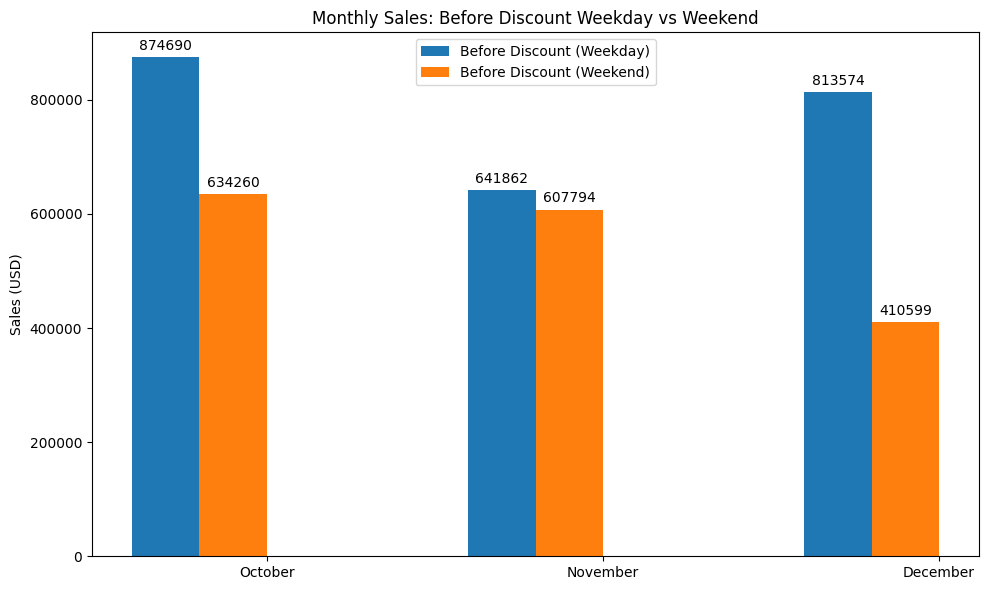

In [28]:

# Extract data
labels = Q4_1_2['month']  # ['December', 'November', 'October']
x = np.arange(len(labels))  # e.g., [0, 1, 2]
width = 0.2  # width of each bar

# Values for each bar group
bef_wd = Q4_1_2['bef_disc_wkday']
bef_we = Q4_1_2['bef_disc_wkend']

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - 1.5*width, bef_wd, width, label='Before Discount (Weekday)')
bars2 = ax.bar(x - 0.5*width, bef_we, width, label='Before Discount (Weekend)')

# Labels and formatting
ax.set_ylabel('Sales (USD)')
ax.set_title('Monthly Sales: Before Discount Weekday vs Weekend')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Optional: Add values on top of bars
for bars in [bars1, bars2]:
    ax.bar_label(bars, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

## `Jawaban No 4.2`

In [29]:
# Tulis kode Anda di bawah ini. Dapat menggunakan lebih dari 1 blok kode
Q4_2 = df5_5.groupby(by=["day_type"],as_index=False).agg({'before_discount': "mean", 'after_discount': 'mean'})
#Q4_2 = Q4_1.groupby(by=["day_type"],as_index=False).agg({'before_discount': "mean", 'after_discount': 'mean'})

#Q4_1["profit"] = Q4_1['after_discount'] - Q4_1['before_discount']
Q4_2

,day_type,before_discount,after_discount
0,weekday,770146.012048,758564.614458
1,weekends,558865.151515,546346.454545


In [30]:
Q4_2_T = Q4_2.set_index('day_type').T
#Q4_2_T["profit"] = Q4_2_T["weekends"] - Q4_2_T["weekday"]
Q4_2_T

day_type,weekday,weekends
before_discount,770146.012048,558865.151515
after_discount,758564.614458,546346.454545


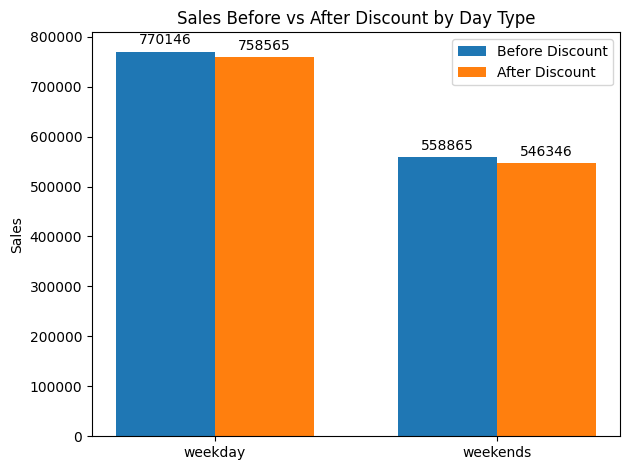

In [31]:
import matplotlib.pyplot as plt
import numpy as np

labels =  Q4_2_T.columns.tolist()  # ['weekday', 'weekends']
x = np.arange(len(labels))  # [0, 1]
width = 0.35

# Extract values from the index (metrics)
before = Q4_2_T.loc['before_discount'].values
after = Q4_2_T.loc['after_discount'].values

# Plot grouped bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, before, width, label='Before Discount')
bars2 = ax.bar(x + width/2, after, width, label='After Discount')

# Labels and legend
ax.set_ylabel('Sales')
ax.set_title('Sales Before vs After Discount by Day Type')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add values on top of bars
ax.bar_label(bars1, fmt='%.0f', padding=3)
ax.bar_label(bars2, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()